In [1]:
from openap import prop
from pprint import pprint

In [2]:
avaiable_aircraft = prop.available_aircraft()

print(f"Supports {len(avaiable_aircraft)} aircraft types")
print(avaiable_aircraft)

Supports 36 aircraft types
['a19n', 'a20n', 'a21n', 'a318', 'a319', 'a320', 'a321', 'a332', 'a333', 'a343', 'a359', 'a388', 'b37m', 'b38m', 'b39m', 'b3xm', 'b734', 'b737', 'b738', 'b739', 'b744', 'b748', 'b752', 'b763', 'b772', 'b773', 'b77w', 'b788', 'b789', 'c550', 'e145', 'e170', 'e190', 'e195', 'e75l', 'glf6']


In [3]:
aircraft = prop.aircraft("A320")
pprint(aircraft)

{'aircraft': 'Airbus A320',
 'ceiling': 12500,
 'cruise': {'height': 11000, 'mach': 0.78},
 'drag': {'cd0': 0.018, 'e': 0.799, 'gears': 0.017, 'k': 0.039},
 'engine': {'default': 'CFM56-5B4',
            'mount': 'wing',
            'number': 2,
            'options': {'A320-111': 'CFM56-5-A1',
                        'A320-211': 'CFM56-5-A1',
                        'A320-212': 'CFM56-5A3',
                        'A320-214': 'CFM56-5B4',
                        'A320-215': 'CFM56-5B5',
                        'A320-216': 'CFM56-5B6',
                        'A320-231': 'V2500-A1',
                        'A320-232': 'V2527-A5',
                        'A320-233': 'V2527E-A5'},
            'type': 'turbofan'},
 'flaps': {'Sf/S': 0.17,
           'area': 21.1,
           'bf/b': 0.78,
           'cf/c': 0.176,
           'lambda_f': 0.9,
           'type': 'single-slotted'},
 'fuel': {'engine': 'CFM56-5B4/P', 'fuel_coef': 2.65942225},
 'fuselage': {'height': 4.14, 'length': 37.57, 'wid

In [4]:
engine = prop.engine("CFM56-5B4")
engine

{'uid': '2CM014',
 'name': 'CFM56-5B4',
 'manufacturer': 'CFM International',
 'type': 'TF',
 'bpr': 5.9,
 'pr': 27.1,
 'max_thrust': 117900,
 'ei_hc_to': 0.1,
 'ei_hc_co': 0.1,
 'ei_hc_app': 0.13,
 'ei_hc_idl': 3.87,
 'ei_co_to': 0.5,
 'ei_co_co': 0.5,
 'ei_co_app': 2.33,
 'ei_co_idl': 31.9,
 'ei_nox_to': 28.7,
 'ei_nox_co': 23.3,
 'ei_nox_app': 10.0,
 'ei_nox_idl': 4.3,
 'ff_to': 1.166,
 'ff_co': 0.961,
 'ff_app': 0.326,
 'ff_idl': 0.107,
 'fuel_lto': 421.0,
 'fuel_c3': 0.0468598,
 'fuel_c2': 0.202282,
 'fuel_c1': 0.871899,
 'fuel_a': 0.587855,
 'fuel_b': 0.417561,
 'cruise_thrust': 22241.0,
 'cruise_sfc': 0.0154,
 'cruise_mach': 0.8,
 'cruise_alt': 35000.0,
 'fuel_ch': 5.2e-07}

In [5]:
from openap.drag import Drag

typecode = "A320"

mass = 62_000  # kg
TAS = 250  # kts
ALT = 20_000  # ft
VS = 1000  # ft/min

drag = Drag(ac=typecode)

# clean configuration
D = drag.clean(mass=mass, tas=TAS, alt=ALT, vs=VS)

print(f"""{typecode} at condition: 
Mass:{mass}  TAS:{TAS}  ALT:{ALT}  VS:{VS} 
Clean configuration 

Total drag is {D//1000} kN
""")

A320 at condition: 
Mass:62000  TAS:250  ALT:20000  VS:1000 
Clean configuration 

Total drag is 33.0 kN



In [6]:
mass = 62_000  # kg
TAS = 150  # kts
ALT = 1000  # ft
VS = 1500  # ft/min
flap_angle = 20  # degree

# with flaps and landing gears
D = drag.nonclean(
    mass=mass,
    tas=TAS,
    alt=ALT,
    flap_angle=flap_angle,
    vs=VS,
    landing_gear=True,
)

print(f"""{typecode} at condition: 
Mass:{mass}  TAS:{TAS}  ALT:{ALT}  VS:{VS} 
Flap:{flap_angle} deg,  Landing Gear extended 

Total drag is {D//1000} kN
""")

A320 at condition: 
Mass:62000  TAS:150  ALT:1000  VS:1500 
Flap:20 deg,  Landing Gear extended 

Total drag is 46.0 kN



In [7]:
from openap.thrust import Thrust

thr_a320 = Thrust(ac="A320", eng="CFM56-5B4")

In [8]:
T = thr_a320.takeoff(tas=100, alt=0)
print(f"Max thrust: {(T/1000).round(2)} kN")

Max thrust: 200.72 kN


In [9]:
T = thr_a320.descent_idle(tas=250, alt=10000)
print(f"Idle thrust: {(T/1000).round(2)} kN")

Idle thrust: 9.31 kN


In [10]:
from openap.kinematic import WRAP

wrap = WRAP(ac="A320")

params = wrap.takeoff_speed()
params = wrap.takeoff_distance()
params = wrap.takeoff_acceleration()
params = wrap.initclimb_vcas()
params = wrap.initclimb_vs()
params = wrap.climb_range()
params = wrap.climb_const_vcas()
params = wrap.climb_const_mach()
params = wrap.climb_cross_alt_concas()
params = wrap.climb_cross_alt_conmach()
params = wrap.climb_vs_pre_concas()
params = wrap.climb_vs_concas()
params = wrap.climb_vs_conmach()
params = wrap.cruise_range()
params = wrap.cruise_alt()
params = wrap.cruise_init_alt()
params = wrap.cruise_mach()
params = wrap.descent_range()
params = wrap.descent_const_mach()
params = wrap.descent_const_vcas()
params = wrap.descent_cross_alt_conmach()
params = wrap.descent_cross_alt_concas()
params = wrap.descent_vs_conmach()
params = wrap.descent_vs_concas()
params = wrap.descent_vs_post_concas()
params = wrap.finalapp_vcas()
params = wrap.finalapp_vs()
params = wrap.landing_speed()
params = wrap.landing_distance()
params = wrap.landing_acceleration()

In [11]:
wrap.takeoff_distance()

{'default': 1.65,
 'minimum': 1.06,
 'maximum': 2.24,
 'statmodel': 'norm',
 'statmodel_params': [1.65, 0.36]}

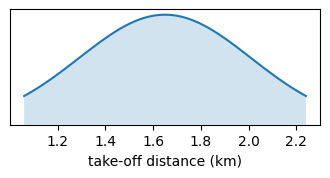

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

params = wrap.takeoff_distance()

mean, std = params["statmodel_params"]

x = np.linspace(params["minimum"], params["maximum"], 100)
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(4, 1.5))
plt.plot(x, y)
plt.fill_between(x, 0, y, alpha=0.2)
plt.ylim(0)
plt.xlabel("take-off distance (km)")
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

{'default': 0.78,
 'minimum': 0.75,
 'maximum': 0.8,
 'statmodel': 'beta',
 'statmodel_params': [17.82, 5.05, 0.62, 0.2]}

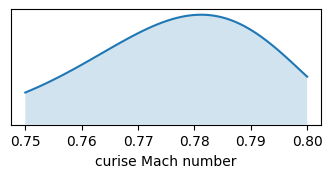

In [13]:
params = wrap.cruise_mach()
display(params)

x = np.linspace(params["minimum"], params["maximum"], 100)

model_class = getattr(stats, params["statmodel"])
model = model_class(*params["statmodel_params"])

y = model.pdf(x)

plt.figure(figsize=(4, 1.5))
plt.plot(x, y)
plt.fill_between(x, 0, y, alpha=0.2)
plt.ylim(0)
plt.xlabel("curise Mach number")
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [16]:
model_class = getattr(stats, params["statmodel"])
model = model_class(*params["statmodel_params"])